# Introduction

<img src="img/bookcover.jpg" height="200" width="150" align ="right">
I recently read the book <a href="https://www.goodreads.com/book/photo/34376766-blood-sweat-and-pixels">"Blood, Sweat, and Pixels"</a> by Jason Schreier. Schreier is the News Editor at  <a href="https://kotaku.com/">Kotaku</a> (the gaming website) and an excellent storyteller. The book recounts the development of various games from AAA blockbusters like <a href="https://en.wikipedia.org/wiki/Destiny_(video_game)">Destiny</a> to one-man hero coded games like <a href="https://en.wikipedia.org/wiki/Stardew_Valley">Stardew Valley</a>. 

I highly recommend this book to anyone who has an interest in gaming, technology, or project management (games present grueling technical and artistic challenges that make managing them a nightmare). One of the more interesting aspects of the book was the exploration of developer-publisher relationship, which can sometimes be antagonistic during  the development process. I was curious to learn more about the impact game publishers have on the industry -- so I created this notebook.

The data in this notebook comes from a web scrape of the VGChartz and Metacritic websites, which I found on Kaggle (https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings). Because the data was fairly clean already, I didn't have to do much to begin diving into the data right away.

# Data Exploration

In [1]:
# Import the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [2]:
raw_data = pd.read_csv('data/Video_Games_Sales_as_at_22_Dec_2016.csv')
raw_data.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


The imported dataset has information going back to 80s. So much has happened in the dynamic gaming industry since then -- large corporations were formed and shuttered -- that I decided to make this simpler by narrowing my scope of review. I decided to focus only on the most recent five years for which data was available (2012-2016).

In [3]:
data = raw_data[(raw_data['Year_of_Release'] <= 2016) & (raw_data['Year_of_Release'] >= 2012)]

In [4]:
# Clean up the fields for critic and user scores
data.loc[:,'Critic_Count'].fillna(0.0, inplace=True)
data.loc[:,'Critic_Score'].fillna(0.0, inplace=True)
data.loc[:,'User_Score'].fillna(0.0, inplace=True)
data.loc[data['User_Score'] == 'tbd', 'User_Score'] = 0.0

/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


# Data Analysis

## Q1 : Which game publishers were the most prolific?

In [5]:
top_n = 5
top_volume = list(data.groupby('Publisher')['Name'].count().nlargest(top_n))
top_publishers = list(data.groupby('Publisher')['Name'].count().nlargest(top_n).index)

In [6]:
print (top_volume)
print (top_publishers)

[332, 185, 182, 163, 120]
['Namco Bandai Games', 'Activision', 'Electronic Arts', 'Ubisoft', 'Nintendo']


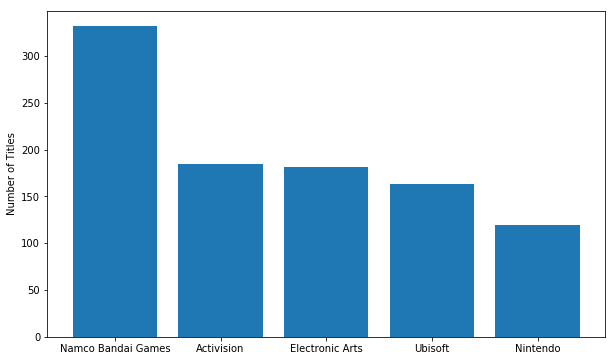

In [7]:
x_vals = [i for i in range(len(top_volume))]
plt.bar(x_vals, top_volume)
plt.xticks(x_vals, top_publishers, rotation=0)
plt.ylabel("Number of Titles")
plt.show()

Holy cow! That's a lot of video games, expecially from Namco Bandai. A total of 332 games from them in five years! That's a lot of programming, art, and storytelling effort to fund in such a short amount of time.

# Q2 : How many games did they sell?

In [8]:
publisher_sales = data[data['Publisher'].isin(top_publishers)].groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)
publisher_sales

Publisher
Electronic Arts       218.57
Nintendo              197.82
Activision            187.67
Ubisoft               129.52
Namco Bandai Games     59.11
Name: Global_Sales, dtype: float64

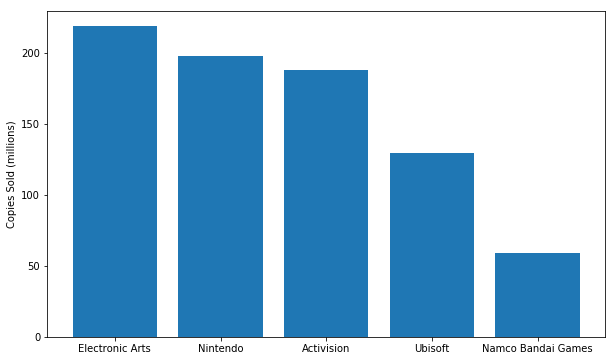

In [9]:
publisher_sales_list = list(publisher_sales.index)

x_vals = [i for i in range(len(publisher_sales))]
plt.bar(x_vals, publisher_sales)
plt.xticks(x_vals, publisher_sales_list, rotation=0)
plt.ylabel("Copies Sold (millions)")
plt.show()


Interestingly, publishing a lot of games did not result directly in higher sales. Despite publishing fewer games, EA and Nintendo ranked higher in total games sold. I was particularly curious to learn why Bandai Namco ranked last, even though it published almost 2x the number of games compared to its closest competitor.

In [10]:
data[data['Publisher'] == 'Namco Bandai Games']['Global_Sales'].describe()

count    332.000000
mean       0.178042
std        0.313464
min        0.010000
25%        0.030000
50%        0.080000
75%        0.190000
max        3.970000
Name: Global_Sales, dtype: float64

In [11]:
data[data['Publisher'] == 'Namco Bandai Games'].groupby('Platform').count()['Name']

Platform
3DS     76
DS       3
PC       7
PS3     79
PS4     34
PSP     40
PSV     45
Wii      6
WiiU    13
X360    20
XOne     9
Name: Name, dtype: int64

Upon closer inspection, it seems that 50% of Namco Bandai's games sold <= 80,000 units. These were likely lower quality games from independent developers who needed help marketing and distributing their games. It's also interesting to note that >90 of the games published by Namco Bandai were for the Sony PSP and Vita consoles, which had small install bases in the market anyway.

# Q3 : What was their overall market share?

In [12]:
data['Global_Sales'].sum()

1446.7399999999607

In [13]:
data[data['Publisher'].isin(top_publishers)].groupby('Publisher')['Global_Sales'].sum() / data['Global_Sales'].sum()

Publisher
Activision            0.129719
Electronic Arts       0.151078
Namco Bandai Games    0.040857
Nintendo              0.136735
Ubisoft               0.089525
Name: Global_Sales, dtype: float64

In [14]:
(data[data['Publisher'].isin(top_publishers)].groupby('Publisher')['Global_Sales'].sum() / data['Global_Sales'].sum()).sum()

0.5479146218394609

Out of the approximately 1.5 billion games sold during this period, only 54% were published by the top publishers in the industry. I'd say that's a pretty good indication of healthy competition in the market.

# Q4 : What were the top games for each of these publishers?

In [15]:
for publisher in top_publishers:
    print (publisher + " :")
    print (data[data['Publisher'] == publisher].groupby('Name')['Global_Sales'].sum().nlargest(5))
    print ("\n")

Namco Bandai Games :
Name
The Witcher 3: Wild Hunt                    6.00
Dark Souls II                               3.01
Dragon Ball: XenoVerse                      2.15
Dark Souls III                              2.11
Naruto Shippuden: Ultimate Ninja Storm 3    1.44
Name: Global_Sales, dtype: float64


Activision :
Name
Call of Duty: Black Ops II        29.40
Call of Duty: Ghosts              27.40
Call of Duty: Black Ops 3         25.68
Call of Duty: Advanced Warfare    21.99
Destiny                           12.55
Name: Global_Sales, dtype: float64


Electronic Arts :
Name
FIFA 15           17.34
FIFA 14           16.48
FIFA 16           16.30
FIFA Soccer 13    15.96
Battlefield 4     13.93
Name: Global_Sales, dtype: float64


Ubisoft :
Name
Assassin's Creed III               13.02
Assassin's Creed IV: Black Flag    13.02
Watch Dogs                          9.19
Just Dance 4                        8.74
Far Cry 4                           8.49
Name: Global_Sales, dtype: float64




It's extremely interesting to me that all three western publishers (Activision, Electronic Arts, and Ubisoft) rely heavily on sequels to make up the bulk of their sales. In the case of Activision and EA, the bulk of their sales come from one franchise (Call of Duty and FIFA, respectively).

# Q5 : What was the relationship between the metacritic scores and sales?

An interesting nugget of information in the book was about how some publishers incentivized developers to make better games by tying bonuses to the Metacritic scores for games after they are released. This was an alarming fact for me, because it ties financial compensation for a piece of art directly to its critical success (thus encouraging a cozy relationship between developers and game reviewers). Plus, it discourages radical experimentation by forcing developers to think about a narrow audience (critics) instead of doing what they inherently feel is fun and fresh.

I was curious to test this idea from the publishers -- that higher review scores lead to higher sales -- by looking at the data.

In [16]:
user_score = list(data[data['Publisher'].isin(top_publishers)]['User_Score'])
critic_score = list(data[data['Publisher'].isin(top_publishers)]['Critic_Score'])
global_sales = list(data[data['Publisher'].isin(top_publishers)]['Global_Sales'])

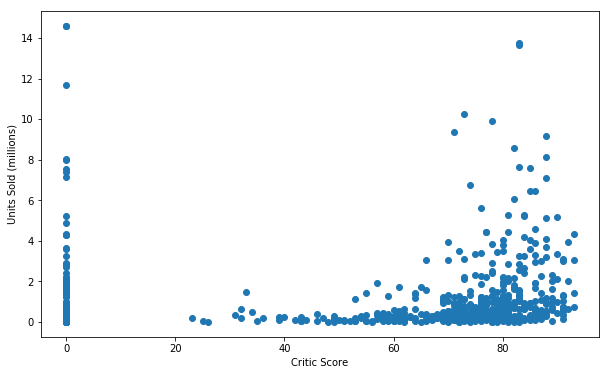

In [17]:
# rel = data.plot(x=critic_score, y=global_sales)
plt.scatter(critic_score, global_sales)
plt.xlabel("Critic Score")
plt.ylabel("Units Sold (millions)")

At this stage, I realized that I would likely have to filter my dataset to be able to draw any meaningful conclusions from it. Because of the infinite number of differentiators between games -- length, content, gameplay, etc. a game like "Dance Central 3" will never sell as many games as, say "Call of Duty," despite how high its Metacritic scores are. Therefore, I chose (somewhat arbitrarily) to filter my data to include only those games that sold >1 million units.

In [18]:
reviews = data.copy()
reviews.loc[:,'Critic_Score'] = pd.to_numeric(reviews['Critic_Score'])
reviews.loc[:,'User_Score'] = pd.to_numeric(reviews['User_Score'])

reviews.loc[:,'Critic_Score'] = reviews[reviews['Critic_Score'] > 0]
reviews.loc[:,'User_Score'] = reviews[reviews['User_Score'] > 0]
reviews.loc[:,'Global_Sales'] = reviews[reviews['Global_Sales'] > 1]

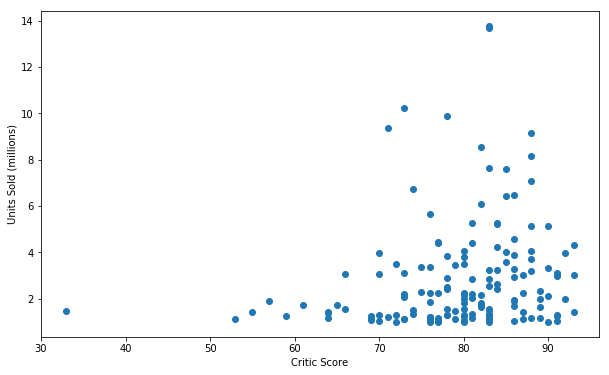

In [19]:
user_score = list(reviews[reviews['Publisher'].isin(top_publishers)]['User_Score'])
critic_score = list(reviews[reviews['Publisher'].isin(top_publishers)]['Critic_Score'])
global_sales = list(reviews[reviews['Publisher'].isin(top_publishers)]['Global_Sales'])

plt.scatter(critic_score, global_sales)
plt.xlabel("Critic Score")
plt.ylabel("Units Sold (millions)")

In [20]:
reviews['Critic_Score'].corr(reviews['Global_Sales'])

0.27127412976659748

As it turns out, critic scores are poorly correlated with global sales. Something developers should remind publishers of next time they are under the gun to make changes to a game. I was also curious to inspect which game lead to >1 mil in sales despite a low critic score (see below). Of course, it was a Call of Duty game for the PS Vita.

In [21]:
data[(data['Global_Sales'] > 1.0) & (data['Critic_Score'] < 50.0) & (data['Critic_Score'] > 10.0)]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1294,Call of Duty Black Ops: Declassified,PSV,2012.0,Action,Activision,0.71,0.43,0.07,0.26,1.47,33.0,58.0,4.8,479.0,Nihilistic,M


# Q6 : What was the relationship between the user scores and sales?

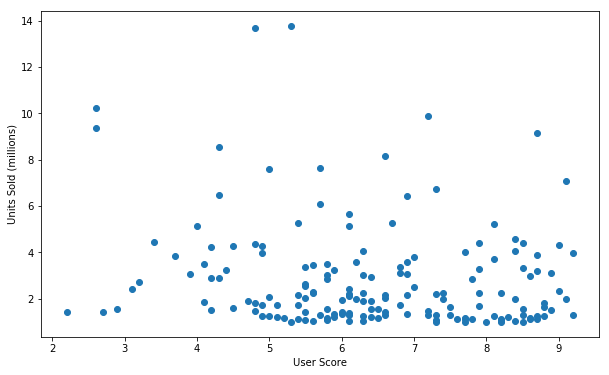

In [22]:
plt.scatter(user_score, global_sales)
plt.xlabel("User Score")
plt.ylabel("Units Sold (millions)")

In [23]:
reviews['User_Score'].corr(reviews['Global_Sales'])

-0.072270270370142664

Again, there is a weak correlation between reviews scores and sales. This is less surprising though, given that user scores likely suffer from self-selection bias. People who review games on the internet are more likely to do so when they are unhappy with the game.

# Q7 : What is the relationship between metacritic scores and user scores?

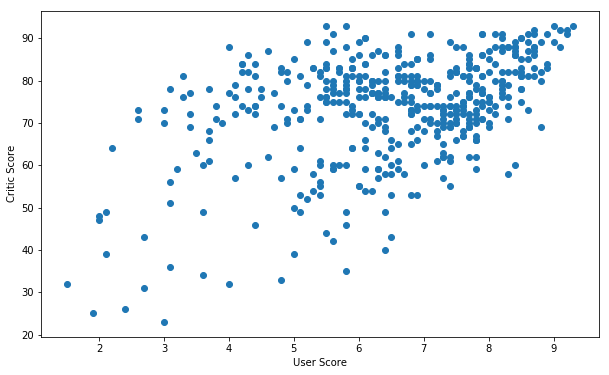

In [24]:
plt.scatter(user_score, critic_score)
plt.xlabel("User Score")
plt.ylabel("Critic Score")

In [25]:
reviews['User_Score'].corr(reviews['Critic_Score'])

0.5177272095232911

I've always wondered how well critic scores represented the sentiment of users. It turns out that there is a moderate correlation between the two, especially given that the user scores likely have the self-selection bias I referred to earlier (the correlation would probably be higher if you could remove the so-called "rage-reviewers")

# Conclusion

All of the analysis in this notebook was done in the matter of a few hours. It's not perfect, but the information shown here does indicate that the relationship between review scores and sales is, in fact, tenuous. But it begs another question -- what DOES result in better sales for a particular game? Is it marketing, console exclusive tie-ins, or something else? It's unclear. What is known, however, is that more developers are <a href="https://mashable.com/2014/03/08/indie-developers-self-publishing/#_ZDbUqGnp8q3">moving away</a> from the traditional publisher model to have more creative freedom. Some <a href="https://www.theverge.com/2018/4/4/17199388/indie-game-publishers-double-fine-annapurna-devolver-skybound">forward thinking publishers</a> are shifting their approach to the industry by offering more support for their creative endeavors (instead of cracking the whip).